In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [8]:
import pandas as pd

# Create a sample dataset
data = {
    'Timestamp': ['2024-02-10 08:00:00', '2024-02-10 09:00:00', '2024-02-10 10:00:00', '2024-02-10 11:00:00'],
    'Location': ['Thika Rd', 'Kangundo Rd', 'Jogoo Rd', 'Juja Rd'],
    'Vehicle_Count': [120, 200, None, 180],  # One missing value
    'Avg_Speed': [45.2, 38.7, 50.1, 42.3],
    'Congestion': [75, None, 50, 60],  # One missing value
    'Weather': ['Sunny', 'Rainy', 'Snowy', 'Cloudy']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv('traffic_data.csv', index=False)

print("CSV file 'traffic_data.csv' has been created successfully.")


CSV file 'traffic_data.csv' has been created successfully.


In [10]:
df = pd.read_csv('traffic_data.csv') 


In [12]:
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      4 non-null      object 
 1   Location       4 non-null      object 
 2   Vehicle_Count  3 non-null      float64
 3   Avg_Speed      4 non-null      float64
 4   Congestion     3 non-null      float64
 5   Weather        4 non-null      object 
dtypes: float64(3), object(3)
memory usage: 324.0+ bytes

Summary Statistics:
       Vehicle_Count  Avg_Speed  Congestion
count       3.000000   4.000000    3.000000
mean      166.666667  44.075000   61.666667
std        41.633320   4.816897   12.583057
min       120.000000  38.700000   50.000000
25%       150.000000  41.400000   55.000000
50%       180.000000  43.750000   60.000000
75%       190.000000  46.425000   67.500000
max       200.000000  50.100000   75.000000


In [14]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Timestamp        0
Location         0
Vehicle_Count    1
Avg_Speed        0
Congestion       1
Weather          0
dtype: int64


In [22]:
# Fill missing values only in numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [26]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


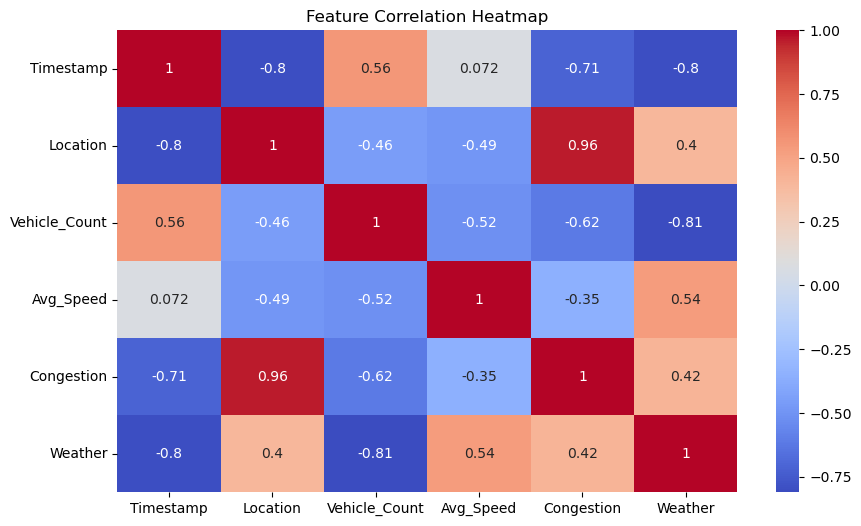

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [30]:
df.to_csv('processed_traffic_data.csv', index=False)


In [32]:
print("Data preprocessing complete. Cleaned data saved as 'processed_traffic_data.csv'.")


Data preprocessing complete. Cleaned data saved as 'processed_traffic_data.csv'.
